## Fetching Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()

In [3]:
x, y = digits['data'], digits['target']

In [4]:
x.shape

(1797, 64)

In [5]:
some_digit = x[1601]
some_digit_image = some_digit.reshape(8,8) #lets reshape to plot it

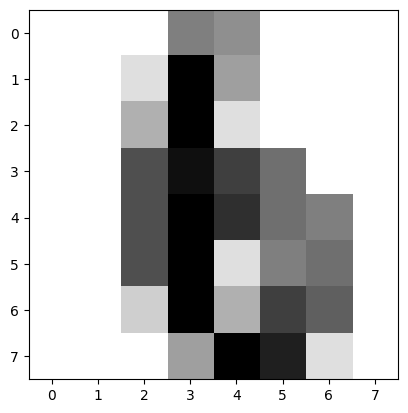

In [6]:
plt.imshow(some_digit_image, cmap = plt.cm.binary, interpolation = "nearest")

In [7]:
y[1601]

6

In [8]:
# seperating the dataset for the first 50% to be training and
# the rest to be testing data
x_train, x_test = x[:899], x[899:]
y_train, y_test = y[:899], y[899:]

In [9]:
shuffle_index = np.random.permutation(899)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating a 2 detector

In [10]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
clf = LogisticRegression(tol = 0.1)

In [13]:
clf.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [14]:
predicted = clf.predict(x_test)

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,x_train,y_train, cv = 3, scoring = "accuracy")

array([0.95333333, 0.96333333, 0.95986622])

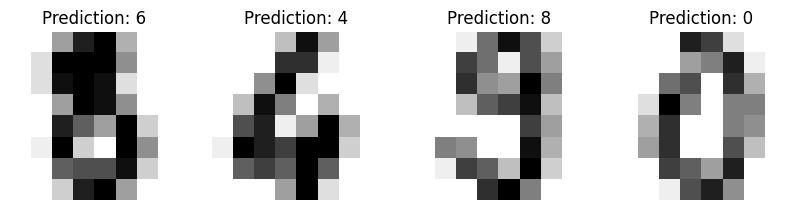

In [18]:
_,axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")